## Raster data with GDAL and rasterio

In [1]:
import os
import sys
from osgeo import gdal, osr
import matplotlib.pyplot as plt
gdal.UseExceptions()

In [2]:
# open dataset
filepath=r"./data/img.tif"
ds = gdal.Open(filepath)
#convert image to array
img = ds.ReadAsArray()
#get data transformation
trans = ds.GetGeoTransform()
#get projection
proj = ds.GetProjection()

In [3]:
inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)
print(inproj)

PROJCS["WGS 84 / UTM zone 49N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",111],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32649"]]


In [4]:
xo, xs, xr, yo, yr, ys = trans

In [5]:
print(xo, xs, xr, yo, yr, ys)

799665.0 30.0 0.0 313995.0 0.0 -30.0


In [6]:
# Dimensions
X = ds.RasterXSize
Y = ds.RasterYSize
print (X,Y)

#get dataset extent
extent = (xo, xo + X*xs,
          yo + Y*yr, yo)

print(extent)

2066 1460
(799665.0, 861645.0, 313995.0, 313995.0)


In [7]:
#get dataset extent
extent = (trans[0], trans[0] + ds.RasterXSize*trans[1],
          trans[3] + ds.RasterYSize*trans[5], trans[3])
print(extent)

(799665.0, 861645.0, 270195.0, 313995.0)


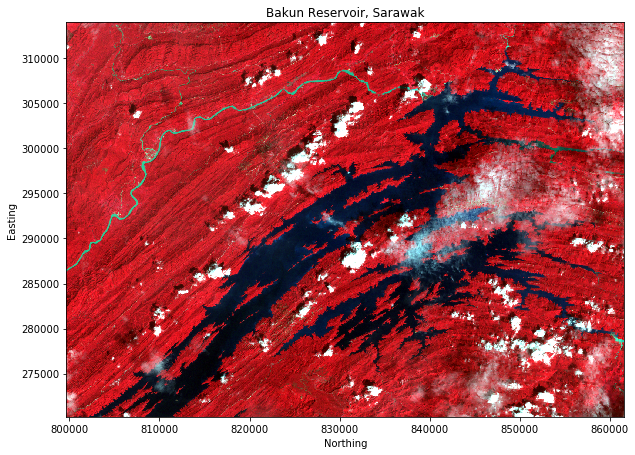

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(img[:3,:,:].transpose((1, 2, 0)), extent=extent)
plt.title('Bakun Reservoir, Sarawak')
plt.xlabel('Northing')
plt.ylabel('Easting')
plt.show()

In [9]:
#src_ds = gdal.Open(filepath)
if ds is None:
    print ('Unable to open INPUT.tif')
    sys.exit(1)
    
print ("RASTER BAND COUNT: ", ds.RasterCount,"\n")

for band in range( ds.RasterCount ):
    band += 1
    print ("BAND: ", band)
    srcband = ds.GetRasterBand(band)
    if srcband is None:
        continue

    stats = srcband.GetStatistics( True, True )
    if stats is None:
        continue

    print ("STATS:\n Minimum=%.3f,\n Maximum=%.3f,\n Mean=%.3f,\n StdDev=%.3f \n" % ( \
                stats[0], stats[1], stats[2], stats[3] ))
    
    for stat in stats:
        print (stat)

RASTER BAND COUNT:  4 

BAND:  1
STATS:
 Minimum=0.000,
 Maximum=255.000,
 Mean=154.843,
 StdDev=69.667 

0.0
255.0
154.84271601261
69.666938615025
BAND:  2
STATS:
 Minimum=0.000,
 Maximum=255.000,
 Mean=42.422,
 StdDev=48.937 

0.0
255.0
42.4215379651
48.937286521131
BAND:  3
STATS:
 Minimum=0.000,
 Maximum=255.000,
 Mean=49.263,
 StdDev=47.622 

0.0
255.0
49.262528855462
47.62206779912
BAND:  4
STATS:
 Minimum=255.000,
 Maximum=255.000,
 Mean=255.000,
 StdDev=0.000 

255.0
255.0
255.0
0.0
